<a href="https://colab.research.google.com/github/AdrianPauer/PRIDAV/blob/main/PauerVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/AdrianPauer/PRIDAV

Cloning into 'PRIDAV'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 42 (delta 3), reused 1 (delta 0), pack-reused 30
Receiving objects: 100% (42/42), 56.79 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (8/8), done.


##Dáta

In [3]:
ratings = pd.read_table('PRIDAV/title_ratings_scraped.tsv', delimiter='\t', na_values = '\\N')
basic = pd.read_table('PRIDAV/title_basics_scraped.tsv', delimiter='\t', na_values = '\\N')
akas = pd.read_table('PRIDAV/title_akas_scraped.tsv', delimiter='\t', na_values = '\\N')
crew = pd.read_table('PRIDAV/title_crew_scraped.tsv', delimiter='\t', na_values = '\\N')
principals = pd.read_table('PRIDAV/title_principals_scraped.tsv', delimiter='\t', na_values = '\\N')
persons = pd.read_table('PRIDAV/name_basics_scraped.tsv', delimiter='\t', na_values = '\\N')

In [4]:
titles = pd.merge(pd.merge(basic,crew, on = 'tconst'),ratings, on = 'tconst')
titles

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,1894.0,1.0,"Documentary,Short",nm0005690,NaN,5.7,2009
1,tt0000011,short,Akrobatisches Potpourri,1895.0,1.0,"Documentary,Short",nm0804434,NaN,5.2,378
2,tt0000022,short,Blacksmith Scene,1895.0,1.0,"Documentary,Short",nm0525910,NaN,5.1,1117
3,tt0000032,short,Die Serpentintänzerin,1895.0,1.0,Short,nm0804434,NaN,5.0,428
4,tt0000042,short,Bateau-mouche sur la Seine,1896.0,NaN,"Documentary,Short",nm0617588,NaN,4.1,38
...,...,...,...,...,...,...,...,...,...,...
138209,tt9916120,tvEpisode,The Evolution of the Bellas,2019.0,NaN,Reality-TV,NaN,NaN,5.2,13
138210,tt9916220,tvEpisode,Episode dated 18 May 1988,1988.0,NaN,"Crime,Documentary,Drama",NaN,NaN,7.2,23
138211,tt9916428,movie,The Secret of China,2019.0,NaN,"Adventure,History,War",nm0910951,NaN,3.5,17
138212,tt9916578,tvEpisode,The Trial of Joan Collins,2019.0,44.0,"Adventure,Biography,Comedy",nm0373673,"nm1485603,nm1485604,nm1866876,nm0909144",7.4,47


In [5]:
# kto co robil v danom filme
principals

,tconst,nconst,category,job,characters
0,tt0000001,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,nm0005690,director,NaN,NaN
2,tt0000001,nm0374658,cinematographer,director of photography,NaN
3,tt0000011,nm3692297,actor,NaN,"[""Acrobats""]"
4,tt0000011,nm0804434,director,NaN,NaN
...,...,...,...,...,...
1150158,tt9916766,nm2563178,producer,producer,NaN
1150159,tt9916766,nm11673614,producer,producer,NaN
1150160,tt9916766,nm11673613,producer,producer,NaN
1150161,tt9916766,nm5559308,producer,producer,NaN


In [6]:
akas

,titleId,title,region,language
0,tt0000001,Карменсіта,UA,NaN
1,tt0000001,Carmencita,DE,NaN
2,tt0000001,Carmencita - spanyol tánc,HU,NaN
3,tt0000001,Καρμενσίτα,GR,NaN
4,tt0000001,Карменсита,RU,NaN
...,...,...,...,...
459984,tt9916766,Episodio #10.15,IT,it
459985,tt9916766,Folge #10.15,DE,de
459986,tt9916766,Episódio #10.15,PT,pt
459987,tt9916766,एपिसोड #10.15,IN,hi


In [7]:
# ludia pre nconst
persons

,nconst,primaryName,birthYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924.0,"actress,soundtrack","tt0037382,tt0117057,tt0075213,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949.0,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0069467"
...,...,...,...,...,...
501021,nm9993410,John Branfield,NaN,writer,tt1687457
501022,nm9993445,Hiroyuki Ishiguro,NaN,producer,"tt13651628,tt8969878,tt8747870"
501023,nm9993475,Juan Sebastián Chamorro,NaN,NaN,"tt0123338,tt1244649"
501024,nm9993693,Apsara Rani,1996.0,actress,"tt8302382,tt13847502,tt8737752,tt12856788"


<Axes: >

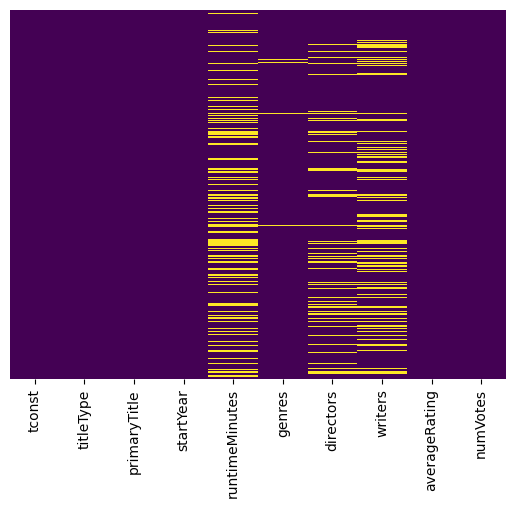

In [8]:
sns.heatmap(titles.isna(),yticklabels = False,cbar=False,cmap = 'viridis') #heatmap of missing values (yellow = NaN)

##Vplyv žánrov na obľúbenosť

In [12]:
atributes = titles[['runtimeMinutes','startYear','genres','averageRating']].dropna().reset_index(drop = True)

In [13]:
atributes

,runtimeMinutes,startYear,genres,averageRating
0,1.0,1894.0,"Documentary,Short",5.7
1,1.0,1895.0,"Documentary,Short",5.2
2,1.0,1895.0,"Documentary,Short",5.1
3,1.0,1895.0,Short,5.0
4,1.0,1896.0,"Documentary,Short",4.2
...,...,...,...,...
97278,8.0,2019.0,"Adventure,Drama,Fantasy",6.0
97279,42.0,2019.0,"Game-Show,Reality-TV",8.3
97280,97.0,2019.0,"Comedy,Drama,Fantasy",6.4
97281,44.0,2019.0,"Adventure,Biography,Comedy",7.4


In [14]:
# multi label encoding of genres
mlb = MultiLabelBinarizer()
genresEncoded = mlb.fit_transform(list(map(lambda x : x.split(','),atributes['genres'].values)))
display(genresEncoded.shape)
print(mlb.classes_)


(97283, 28)

['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'Game-Show'
 'History' 'Horror' 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV'
 'Romance' 'Sci-Fi' 'Short' 'Sport' 'Talk-Show' 'Thriller' 'War' 'Western']


In [15]:
genres = pd.DataFrame(genresEncoded, columns = mlb.classes_)
genres['startYear'] = atributes['startYear']
genres['averageRating'] = atributes['averageRating']

# counts of filmed genres in years
counts = genres.groupby('startYear').sum().reset_index()
counts['sum'] = counts.apply(lambda x: sum(x[1:29]), axis = 1)

overalSum = counts.apply(sum, axis = 0)

#fraction of filmed genres in specific year
for genre in mlb.classes_:
  counts[genre] = counts[genre] / counts['sum']

counts

,startYear,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating,sum
0,1885.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.3,2.0
1,1887.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,10.2,4.0
2,1888.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.7,1.0
3,1894.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.500000,0.166667,0.000000,0.000000,0.000000,0.000000,15.0,6.0
4,1895.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,...,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,30.4,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2019.0,0.063711,0.001118,0.049180,0.052534,0.012543,0.134625,0.062966,0.082961,0.173994,...,0.032538,0.013910,0.067188,0.008569,0.018256,0.029930,0.002360,0.001366,27973.6,8052.0
129,2020.0,0.049266,0.001048,0.039383,0.047320,0.012279,0.138215,0.058550,0.089698,0.172656,...,0.033693,0.011980,0.073824,0.011680,0.022612,0.032645,0.002845,0.001348,23068.0,6678.0
130,2021.0,0.057931,0.000968,0.042924,0.043569,0.014362,0.126029,0.060513,0.083589,0.186058,...,0.044860,0.013555,0.059384,0.013394,0.015975,0.037115,0.001452,0.001130,21619.9,6197.0
131,2022.0,0.052281,0.000901,0.040743,0.035875,0.017307,0.132324,0.062917,0.085812,0.197584,...,0.038760,0.013881,0.048495,0.011718,0.012079,0.046692,0.003065,0.002884,19334.8,5547.0


Text(0.5, 1.0, 'average count of filmed genre in 2020 ')

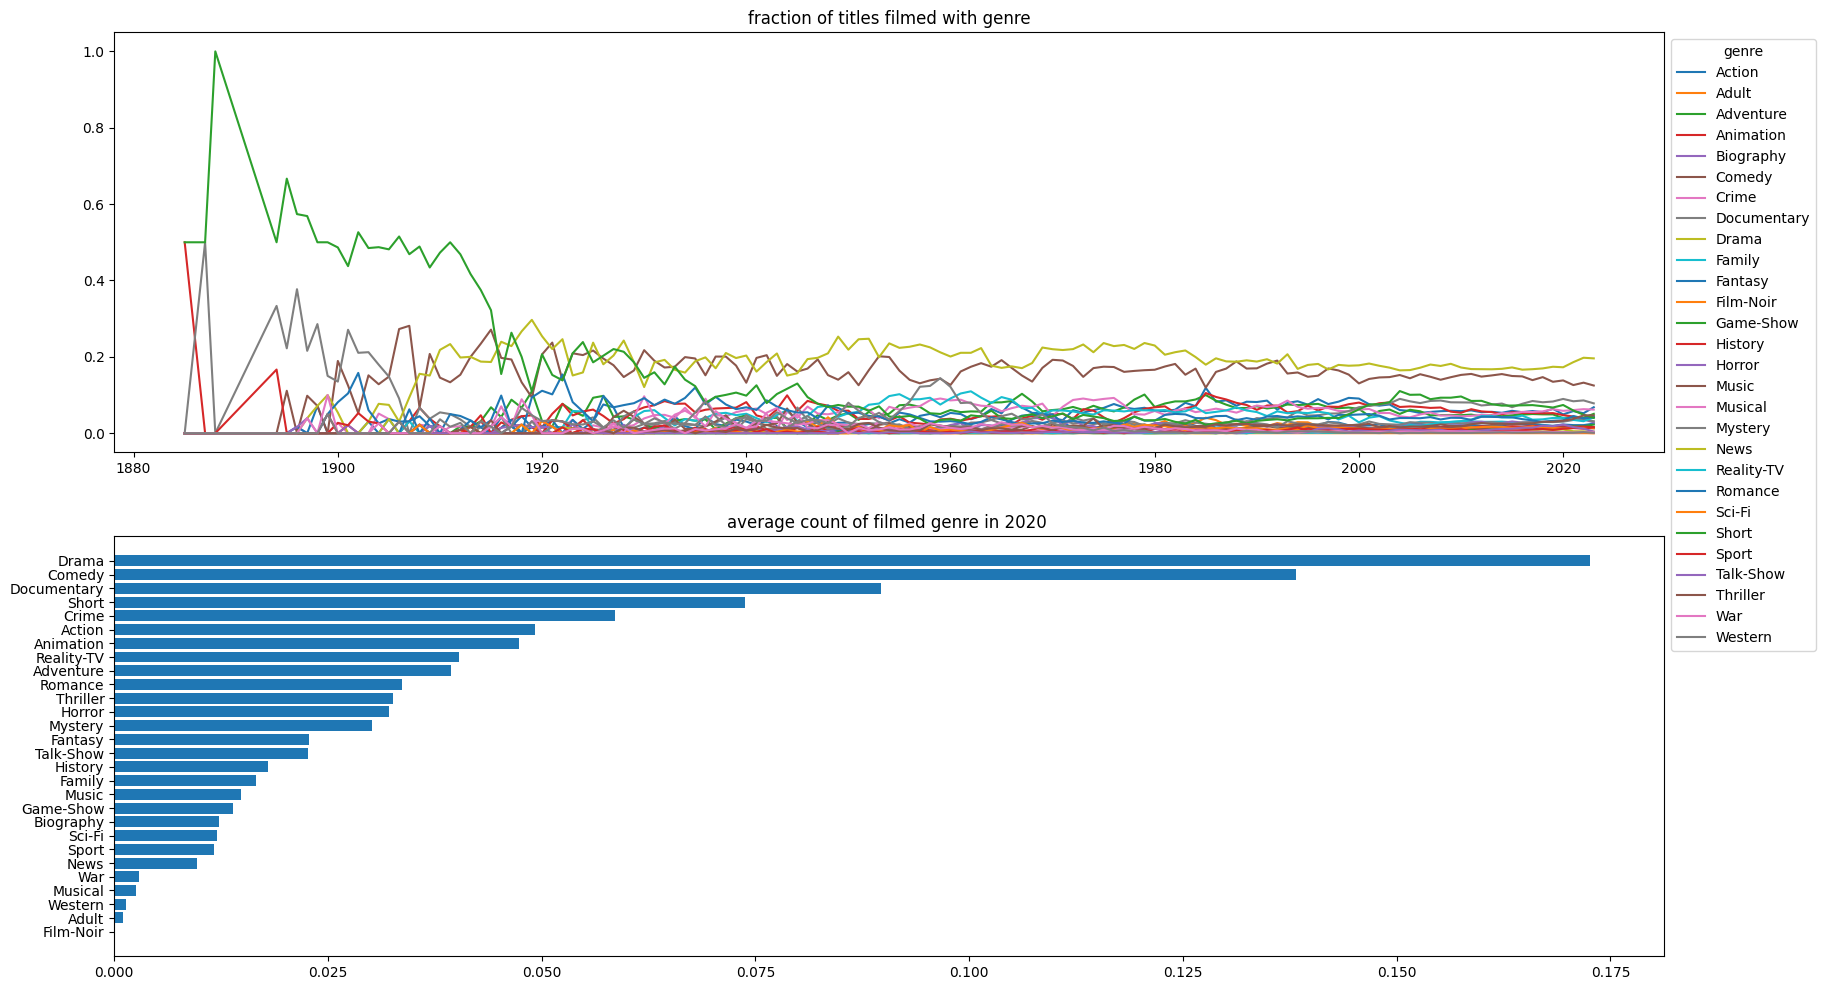

In [16]:
year2020 = counts.loc[129].sort_values(ascending= False)[3:]
fig, ax = plt.subplots(2,1,figsize = (20,12))
for genre in mlb.classes_:
  ax[0].plot(counts['startYear'], counts[genre], label = genre)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels,bbox_to_anchor=(1, 1),loc = 2,title = 'genre' )
ax[0].set_title('fraction of titles filmed with genre')

ax[1].barh(np.arange(28), year2020.values)
ax[1].set_yticks(np.arange(28), year2020.index)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_title('average count of filmed genre in 2020 ')


Text(0.5, 1.0, 'average count of filmed genre')

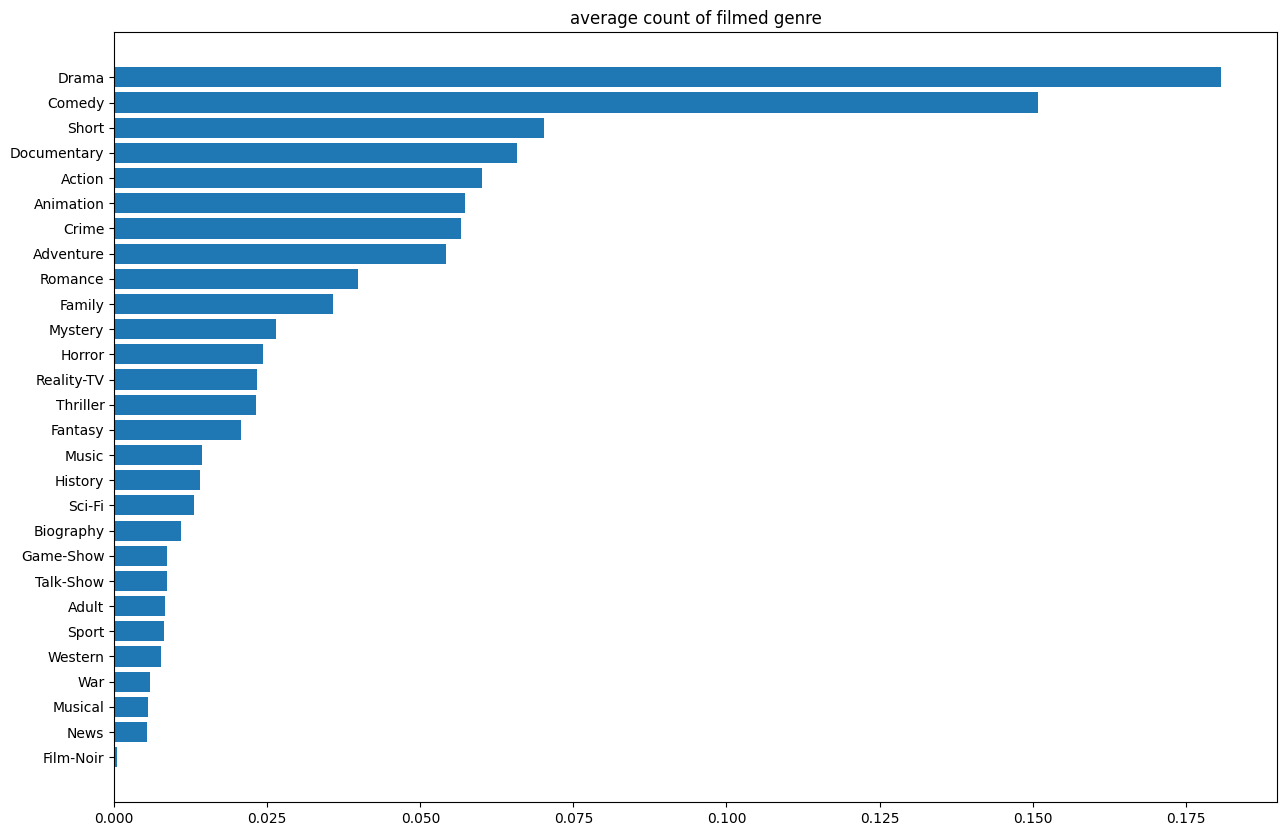

In [18]:
overalSum /= overalSum['sum']
overalSum = overalSum.sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (15,10))
ax.barh(np.arange(28), overalSum.values[3:])
ax.set_yticks(np.arange(28), overalSum.index[3:])
ax.invert_yaxis()
ax.set_title('average count of filmed genre')

In [19]:
# average rating for each genre
ratings = dict()
runTime = dict()
for genre in mlb.classes_:
  ratings[genre] = atributes[genres[genre] == 1]['averageRating'].mean()
  runTime[genre] = atributes[genres[genre] == 1]['runtimeMinutes'].mean()

avg = pd.DataFrame()
avg['genre'] = ratings.keys()
avg['avgRat'] = ratings.values()
avg['avgMin'] = runTime.values()
avg = avg.sort_values(by = 'avgRat')
avg[['genre','avgRat']]

,genre,avgRat
14,Horror,5.976142
1,Adult,6.214756
25,Thriller,6.214908
11,Film-Noir,6.429348
16,Musical,6.551429
21,Sci-Fi,6.574017
18,News,6.622797
24,Talk-Show,6.718658
20,Romance,6.735631
22,Short,6.826684


In [20]:
# regression analysis
genres = pd.DataFrame(genresEncoded, columns = mlb.classes_)
genres['averageRating'] = atributes['averageRating']
genres['startYear'] = atributes['startYear']
genres['runtimeMinutes'] = atributes['runtimeMinutes']

# normalise data to z score
for clas in genres.columns:
  genres[clas] = (genres[clas] - genres[clas].mean())/genres[clas].std()
genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating,startYear,runtimeMinutes
0,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-0.877047,-4.900430,-0.354163
1,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-1.251557,-4.854672,-0.354163
2,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-1.326459,-4.854672,-0.354163
3,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,-0.393066,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-1.401361,-4.854672,-0.354163
4,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-2.000578,-4.808913,-0.354163


In [21]:
genres.describe().loc[['mean','std']]

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating,startYear,runtimeMinutes
mean,-1.175924e-17,2.337240e-18,-6.106038e-17,-8.764648e-18,6.427409e-18,-2.746256e-17,-1.928223e-17,2.570964e-17,-5.843099e-17,-2.337240e-17,...,5.843099e-19,6.953288e-17,-2.651306e-17,-2.103516e-17,1.577637e-17,-4.557617e-17,3.973307e-17,3.529232e-16,-3.571302e-15,1.285482e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [22]:
from sklearn.linear_model import LinearRegression
X = genres[list(mlb.classes_)]
y = genres['averageRating'].values
reg = LinearRegression().fit(X, y)

In [23]:
reg.score(X,y)

0.06932229308694471

In [27]:
result = pd.DataFrame(zip(reg.coef_,reg.feature_names_in_),columns = ['coef','genre']).sort_values(by = 'coef', ascending = False )
display(result.head())
result.tail()

,coef,genre
7,0.154962,Documentary
8,0.112811,Drama
5,0.071277,Comedy
6,0.064295,Crime
19,0.064093,Reality-TV


,coef,genre
16,-0.016101,Musical
18,-0.016666,News
1,-0.032924,Adult
25,-0.065821,Thriller
14,-0.115435,Horror


In [26]:
#najmensie koeficienty
result.loc[abs(result['coef']) < 0.01]

,coef,genre
24,0.009011,Talk-Show
4,0.007645,Biography
26,0.004151,War
21,-0.008714,Sci-Fi


In [28]:
import seaborn as sns

In [30]:
# correlation with rating
#attributesToReg = attributesToReg[(attributesToReg['runtimeMinutes'] < 300) & (attributesToReg['runtimeMinutes'] > 10)]
atributes['genres'] = list(map(lambda x : x.split(',')[0], atributes['genres']))

Text(0.5, 1.0, 'Worst 3 rated genres')

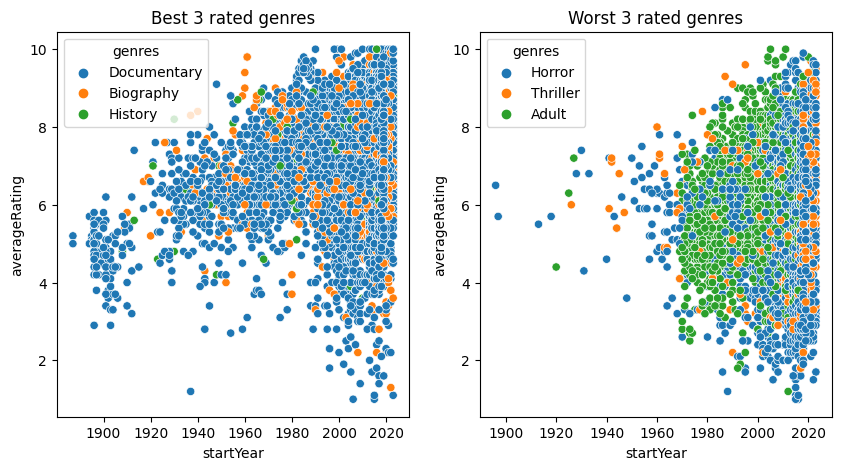

In [31]:
fig, ax = plt.subplots(1,2,figsize = (10, 5))

bestGenres = atributes[((atributes['genres'] == 'History') | (atributes['genres'] == 'Documentary') | (atributes['genres'] == 'Biography'))]
worstGenres = atributes[((atributes['genres'] == 'Horror') | (atributes['genres'] == 'Adult') | (atributes['genres'] == 'Thriller'))]

grid1 = sns.scatterplot(data = bestGenres, x = "startYear", y= "averageRating", hue = "genres", ax = ax[0])
grid1.set_title('Best 3 rated genres')
grid2 = sns.scatterplot(data = worstGenres, x = "startYear", y= "averageRating", hue = "genres", ax = ax[1])
grid2.set_title('Worst 3 rated genres')


In [32]:
# correlation of best and worst rated genres
print(bestGenres['startYear'].corr(bestGenres['averageRating'], method = 'pearson'))
print(worstGenres['startYear'].corr(worstGenres['averageRating'], method = 'pearson'))
print(atributes['startYear'].corr(atributes['averageRating'], method = 'pearson'))

0.23345604401536502
0.014207334179680587
0.14632187980772113


-0.05752965824125331

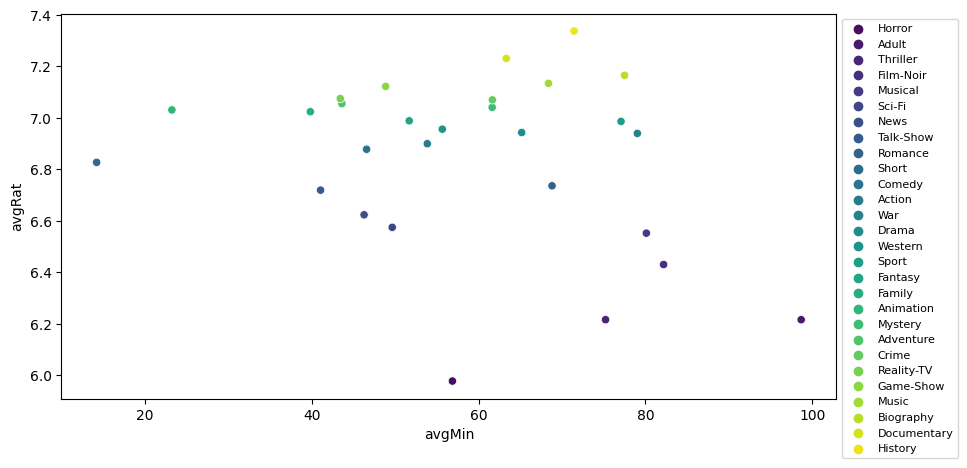

In [33]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data = avg, x = 'avgMin', y = 'avgRat', hue = 'genre', palette = "viridis", ax = ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,bbox_to_anchor=(1, 1),loc = 2,fontsize=8)
atributes['runtimeMinutes'].corr(atributes['averageRating'])